In [20]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import manifold

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

#import astropy, pylab, time, sys, os, requests, json

#from PIL import Image
#from io import BytesIO

#from astropy.table import Table, join
#from astropy.io import ascii

# Set page width to fill browser for longer output lines
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# set width for pprint
#astropy.conf.max_width = 150

In [2]:
tf.keras.backend.set_floatx('float64')

In [4]:
"""
Import Data
"""

df_data = pd.read_csv('../data/lightCurves/lc_g_n100.csv');
objects = df_data.objectid.unique();
N_lc = objects.shape[0];
N_lc_source = np.unique(df_data.objectid, return_counts=True)[1];

print("df_data shape:", df_data.shape)
print("# of objects:", N_lc)
print("filters:", df_data['filter'].unique().tolist())

df_data shape: (999762, 5)
# of objects: 3658
filters: ['g']


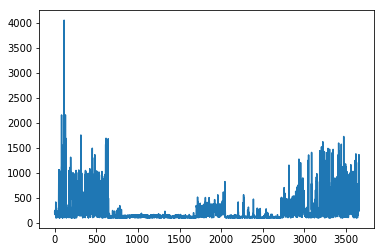

In [361]:
plt.plot(N_lc_source)

In [365]:
df_data.head()

,objectid,mjd,mag_aper2,magerr_aper2,filter
0,100046_18011,56514.094813,20.8285,0.028703,g
1,100046_18011,56514.095494,20.9399,0.045552,g
2,100046_18011,56514.179904,20.8797,0.041852,g
3,100046_18011,56515.179630,20.9502,0.043561,g
4,100046_18011,56538.202622,20.6387,0.015850,g


In [7]:
X, Y = df_data.mjd, df_data.mag_aper2

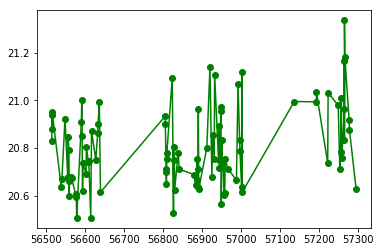

In [8]:
plt.plot(X[:100], Y[:100], 'go', linestyle='solid')

## Preprocess Data

In [12]:
X_raw = np.load('../data/lightCurves/lc_g_n100.npy');
X_raw.shape

(3658, 100, 3)

In [13]:
X = X_raw.copy()
X.shape

(3658, 100, 3)

In [14]:
# Shift mjd to start at 0
mins = np.atleast_2d(np.amin(X[:,:,0], axis=1)).T
X[:,:,0] -= mins

## AutoEncoder Model

In [15]:
X_train, X_test = train_test_split(X[:,:,1], test_size=0.2, random_state=0)
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)

X_train.shape = (2926, 100)
X_test.shape = (732, 100)


In [21]:
layer1_dim = 60
layer2_dim = 40
latent_layer_dim = 10

class Autoencoder(Model):
    def __init__(self, latent_layer_dim):
        super(Autoencoder, self).__init__()
        self.latent_layer_dim = latent_layer_dim
        
        self.encoder = tf.keras.Sequential([
            #layers.Dense(layer1_dim, activation='relu'),
            #layers.Dense(layer2_dim, activation='relu'),
            layers.Dense(latent_layer_dim, activation='linear'),
        ])
        
        self.decoder = tf.keras.Sequential([
            #layers.Dense(layer2_dim, activation='relu'),
            #layers.Dense(layer1_dim, activation='relu'),
            layers.Dense(100),
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [22]:
autoencoder = Autoencoder(latent_layer_dim)

In [23]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [24]:
history = autoencoder.fit(X_train, X_train,
                epochs=1000,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 2926 samples, validate on 732 samples
Epoch 1/1000
2926/2926 [==============================] - 1s 186us/sample - loss: 217.1636 - val_loss: 16.2400
Epoch 2/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 2.8925 - val_loss: 0.0772
Epoch 3/1000
2926/2926 [==============================] - 0s 66us/sample - loss: 0.7186 - val_loss: 0.1171
Epoch 4/1000
2926/2926 [==============================] - 0s 67us/sample - loss: 0.7029 - val_loss: 0.0279
Epoch 5/1000
2926/2926 [==============================] - 0s 62us/sample - loss: 0.6717 - val_loss: 0.0401
Epoch 6/1000
2926/2926 [==============================] - 0s 71us/sample - loss: 0.6459 - val_loss: 0.1223
Epoch 7/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.6372 - val_loss: 0.0457
Epoch 8/1000
2926/2926 [==============================] - 0s 67us/sample - loss: 0.6112 - val_loss: 0.0843
Epoch 9/1000
2926/2926 [==============================] - 0s 78us/sample - loss: 0.6035 - val

2926/2926 [==============================] - 0s 56us/sample - loss: 0.1502 - val_loss: 0.0305
Epoch 77/1000
2926/2926 [==============================] - 0s 53us/sample - loss: 0.1471 - val_loss: 0.0272
Epoch 78/1000
2926/2926 [==============================] - 0s 53us/sample - loss: 0.1484 - val_loss: 0.0294
Epoch 79/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 0.1470 - val_loss: 0.0377
Epoch 80/1000
2926/2926 [==============================] - 0s 56us/sample - loss: 0.1462 - val_loss: 0.0336
Epoch 81/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.1440 - val_loss: 0.0368
Epoch 82/1000
2926/2926 [==============================] - 0s 53us/sample - loss: 0.1452 - val_loss: 0.0307
Epoch 83/1000
2926/2926 [==============================] - 0s 52us/sample - loss: 0.1438 - val_loss: 0.0283
Epoch 84/1000
2926/2926 [==============================] - 0s 57us/sample - loss: 0.1429 - val_loss: 0.0309
Epoch 85/1000
2926/2926 [=================

2926/2926 [==============================] - 0s 71us/sample - loss: 0.0731 - val_loss: 0.0253
Epoch 152/1000
2926/2926 [==============================] - 0s 54us/sample - loss: 0.0701 - val_loss: 0.1606
Epoch 153/1000
2926/2926 [==============================] - 0s 54us/sample - loss: 0.1029 - val_loss: 0.0249
Epoch 154/1000
2926/2926 [==============================] - 0s 54us/sample - loss: 0.0721 - val_loss: 0.0293
Epoch 155/1000
2926/2926 [==============================] - 0s 53us/sample - loss: 0.0688 - val_loss: 0.0272
Epoch 156/1000
2926/2926 [==============================] - 0s 52us/sample - loss: 0.0648 - val_loss: 0.0286
Epoch 157/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 0.0632 - val_loss: 0.0318
Epoch 158/1000
2926/2926 [==============================] - 0s 55us/sample - loss: 0.0623 - val_loss: 0.0265
Epoch 159/1000
2926/2926 [==============================] - 0s 53us/sample - loss: 0.0625 - val_loss: 0.0256
Epoch 160/1000
2926/2926 [========

2926/2926 [==============================] - 0s 60us/sample - loss: 0.0287 - val_loss: 0.0268
Epoch 227/1000
2926/2926 [==============================] - 0s 59us/sample - loss: 0.0288 - val_loss: 0.0243
Epoch 228/1000
2926/2926 [==============================] - 0s 59us/sample - loss: 0.0304 - val_loss: 0.0273
Epoch 229/1000
2926/2926 [==============================] - 0s 62us/sample - loss: 0.0312 - val_loss: 0.0272
Epoch 230/1000
2926/2926 [==============================] - 0s 68us/sample - loss: 0.0401 - val_loss: 0.0293
Epoch 231/1000
2926/2926 [==============================] - 0s 60us/sample - loss: 0.0395 - val_loss: 0.0238
Epoch 232/1000
2926/2926 [==============================] - 0s 59us/sample - loss: 0.0348 - val_loss: 0.0313
Epoch 233/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 0.0319 - val_loss: 0.0247
Epoch 234/1000
2926/2926 [==============================] - 0s 57us/sample - loss: 0.0313 - val_loss: 0.0236
Epoch 235/1000
2926/2926 [========

2926/2926 [==============================] - 0s 84us/sample - loss: 0.0250 - val_loss: 0.0241
Epoch 302/1000
2926/2926 [==============================] - 0s 56us/sample - loss: 0.0256 - val_loss: 0.0242
Epoch 303/1000
2926/2926 [==============================] - 0s 50us/sample - loss: 0.0266 - val_loss: 0.0285
Epoch 304/1000
2926/2926 [==============================] - 0s 52us/sample - loss: 0.0292 - val_loss: 0.0309
Epoch 305/1000
2926/2926 [==============================] - 0s 56us/sample - loss: 0.0339 - val_loss: 0.0242
Epoch 306/1000
2926/2926 [==============================] - 0s 68us/sample - loss: 0.0324 - val_loss: 0.0242
Epoch 307/1000
2926/2926 [==============================] - 0s 69us/sample - loss: 0.0298 - val_loss: 0.0234
Epoch 308/1000
2926/2926 [==============================] - 0s 86us/sample - loss: 0.0289 - val_loss: 0.0254
Epoch 309/1000
2926/2926 [==============================] - 0s 52us/sample - loss: 0.0276 - val_loss: 0.0294
Epoch 310/1000
2926/2926 [========

2926/2926 [==============================] - 0s 61us/sample - loss: 0.0249 - val_loss: 0.0244
Epoch 377/1000
2926/2926 [==============================] - 0s 55us/sample - loss: 0.0241 - val_loss: 0.0304
Epoch 378/1000
2926/2926 [==============================] - 0s 53us/sample - loss: 0.0263 - val_loss: 0.0225
Epoch 379/1000
2926/2926 [==============================] - 0s 52us/sample - loss: 0.0252 - val_loss: 0.0259
Epoch 380/1000
2926/2926 [==============================] - 0s 55us/sample - loss: 0.0265 - val_loss: 0.0240
Epoch 381/1000
2926/2926 [==============================] - 0s 51us/sample - loss: 0.0251 - val_loss: 0.0233
Epoch 382/1000
2926/2926 [==============================] - 0s 65us/sample - loss: 0.0262 - val_loss: 0.0406
Epoch 383/1000
2926/2926 [==============================] - 0s 54us/sample - loss: 0.0281 - val_loss: 0.0269
Epoch 384/1000
2926/2926 [==============================] - 0s 53us/sample - loss: 0.0268 - val_loss: 0.0239
Epoch 385/1000
2926/2926 [========

2926/2926 [==============================] - 0s 73us/sample - loss: 0.0235 - val_loss: 0.0235
Epoch 452/1000
2926/2926 [==============================] - 0s 56us/sample - loss: 0.0243 - val_loss: 0.0224
Epoch 453/1000
2926/2926 [==============================] - 0s 55us/sample - loss: 0.0241 - val_loss: 0.0222
Epoch 454/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 0.0237 - val_loss: 0.0256
Epoch 455/1000
2926/2926 [==============================] - 0s 59us/sample - loss: 0.0240 - val_loss: 0.0260
Epoch 456/1000
2926/2926 [==============================] - 0s 55us/sample - loss: 0.0235 - val_loss: 0.0245
Epoch 457/1000
2926/2926 [==============================] - ETA: 0s - loss: 0.025 - 0s 62us/sample - loss: 0.0247 - val_loss: 0.0223
Epoch 458/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 0.0245 - val_loss: 0.0232
Epoch 459/1000
2926/2926 [==============================] - 0s 54us/sample - loss: 0.0251 - val_loss: 0.0239
Epoch 460/

2926/2926 [==============================] - 0s 58us/sample - loss: 0.0236 - val_loss: 0.0219
Epoch 526/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 0.0238 - val_loss: 0.0235
Epoch 527/1000
2926/2926 [==============================] - 0s 60us/sample - loss: 0.0230 - val_loss: 0.0227
Epoch 528/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 0.0235 - val_loss: 0.0228
Epoch 529/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.0233 - val_loss: 0.0256
Epoch 530/1000
2926/2926 [==============================] - 0s 57us/sample - loss: 0.0241 - val_loss: 0.0225
Epoch 531/1000
2926/2926 [==============================] - 0s 55us/sample - loss: 0.0231 - val_loss: 0.0227
Epoch 532/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 0.0238 - val_loss: 0.0229
Epoch 533/1000
2926/2926 [==============================] - 0s 64us/sample - loss: 0.0242 - val_loss: 0.0232
Epoch 534/1000
2926/2926 [========

2926/2926 [==============================] - 0s 55us/sample - loss: 0.0238 - val_loss: 0.0234
Epoch 601/1000
2926/2926 [==============================] - 0s 52us/sample - loss: 0.0230 - val_loss: 0.0253
Epoch 602/1000
2926/2926 [==============================] - 0s 52us/sample - loss: 0.0235 - val_loss: 0.0230
Epoch 603/1000
2926/2926 [==============================] - 0s 52us/sample - loss: 0.0241 - val_loss: 0.0229
Epoch 604/1000
2926/2926 [==============================] - 0s 51us/sample - loss: 0.0241 - val_loss: 0.0216
Epoch 605/1000
2926/2926 [==============================] - 0s 82us/sample - loss: 0.0243 - val_loss: 0.0266
Epoch 606/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 0.0252 - val_loss: 0.0222
Epoch 607/1000
2926/2926 [==============================] - 0s 53us/sample - loss: 0.0254 - val_loss: 0.0249
Epoch 608/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 0.0255 - val_loss: 0.0216
Epoch 609/1000
2926/2926 [========

2926/2926 [==============================] - 0s 61us/sample - loss: 0.0248 - val_loss: 0.0210
Epoch 676/1000
2926/2926 [==============================] - 0s 54us/sample - loss: 0.0242 - val_loss: 0.0227
Epoch 677/1000
2926/2926 [==============================] - 0s 54us/sample - loss: 0.0237 - val_loss: 0.0247
Epoch 678/1000
2926/2926 [==============================] - 0s 58us/sample - loss: 0.0242 - val_loss: 0.0228
Epoch 679/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.0249 - val_loss: 0.0218
Epoch 680/1000
2926/2926 [==============================] - 0s 65us/sample - loss: 0.0253 - val_loss: 0.0215
Epoch 681/1000
2926/2926 [==============================] - 0s 66us/sample - loss: 0.0240 - val_loss: 0.0256
Epoch 682/1000
2926/2926 [==============================] - 0s 62us/sample - loss: 0.0245 - val_loss: 0.0207
Epoch 683/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.0235 - val_loss: 0.0216
Epoch 684/1000
2926/2926 [========

2926/2926 [==============================] - 0s 94us/sample - loss: 0.0215 - val_loss: 0.0236
Epoch 751/1000
2926/2926 [==============================] - 0s 76us/sample - loss: 0.0221 - val_loss: 0.0212
Epoch 752/1000
2926/2926 [==============================] - 0s 60us/sample - loss: 0.0215 - val_loss: 0.0212
Epoch 753/1000
2926/2926 [==============================] - 0s 59us/sample - loss: 0.0219 - val_loss: 0.0208
Epoch 754/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.0222 - val_loss: 0.0208
Epoch 755/1000
2926/2926 [==============================] - 0s 60us/sample - loss: 0.0246 - val_loss: 0.0215
Epoch 756/1000
2926/2926 [==============================] - 0s 72us/sample - loss: 0.0293 - val_loss: 0.0288
Epoch 757/1000
2926/2926 [==============================] - 0s 59us/sample - loss: 0.0309 - val_loss: 0.0211
Epoch 758/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.0271 - val_loss: 0.0436
Epoch 759/1000
2926/2926 [========

2926/2926 [==============================] - 0s 59us/sample - loss: 0.0224 - val_loss: 0.0201
Epoch 826/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.0220 - val_loss: 0.0206
Epoch 827/1000
2926/2926 [==============================] - 0s 85us/sample - loss: 0.0223 - val_loss: 0.0209
Epoch 828/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.0251 - val_loss: 0.0204
Epoch 829/1000
2926/2926 [==============================] - 0s 62us/sample - loss: 0.0250 - val_loss: 0.0220
Epoch 830/1000
2926/2926 [==============================] - 0s 65us/sample - loss: 0.0249 - val_loss: 0.0770
Epoch 831/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.0309 - val_loss: 0.0248
Epoch 832/1000
2926/2926 [==============================] - 0s 76us/sample - loss: 0.0267 - val_loss: 0.0212
Epoch 833/1000
2926/2926 [==============================] - 0s 62us/sample - loss: 0.0252 - val_loss: 0.0205
Epoch 834/1000
2926/2926 [========

Epoch 900/1000
2926/2926 [==============================] - 0s 59us/sample - loss: 0.0237 - val_loss: 0.0205
Epoch 901/1000
2926/2926 [==============================] - 0s 60us/sample - loss: 0.0239 - val_loss: 0.0203
Epoch 902/1000
2926/2926 [==============================] - 0s 57us/sample - loss: 0.0219 - val_loss: 0.0215
Epoch 903/1000
2926/2926 [==============================] - 0s 57us/sample - loss: 0.0213 - val_loss: 0.0204
Epoch 904/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.0204 - val_loss: 0.0205
Epoch 905/1000
2926/2926 [==============================] - 0s 79us/sample - loss: 0.0203 - val_loss: 0.0197
Epoch 906/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.0207 - val_loss: 0.0207
Epoch 907/1000
2926/2926 [==============================] - 0s 61us/sample - loss: 0.0207 - val_loss: 0.0209
Epoch 908/1000
2926/2926 [==============================] - 0s 64us/sample - loss: 0.0212 - val_loss: 0.0197
Epoch 909/1000
2926

2926/2926 [==============================] - 0s 88us/sample - loss: 0.0206 - val_loss: 0.0261
Epoch 976/1000
2926/2926 [==============================] - 0s 92us/sample - loss: 0.0207 - val_loss: 0.0194
Epoch 977/1000
2926/2926 [==============================] - 0s 85us/sample - loss: 0.0203 - val_loss: 0.0197
Epoch 978/1000
2926/2926 [==============================] - 0s 93us/sample - loss: 0.0208 - val_loss: 0.0199
Epoch 979/1000
2926/2926 [==============================] - 0s 95us/sample - loss: 0.0202 - val_loss: 0.0209
Epoch 980/1000
2926/2926 [==============================] - 0s 96us/sample - loss: 0.0200 - val_loss: 0.0192
Epoch 981/1000
2926/2926 [==============================] - 0s 90us/sample - loss: 0.0202 - val_loss: 0.0223
Epoch 982/1000
2926/2926 [==============================] - 0s 88us/sample - loss: 0.0202 - val_loss: 0.0201
Epoch 983/1000
2926/2926 [==============================] - 0s 88us/sample - loss: 0.0202 - val_loss: 0.0208
Epoch 984/1000
2926/2926 [========

loss        0.020000
val_loss    0.019167
dtype: float64


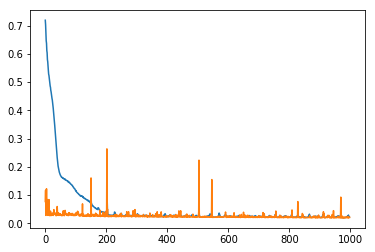

In [29]:
print(pd.DataFrame(history.history).min())
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][1:])

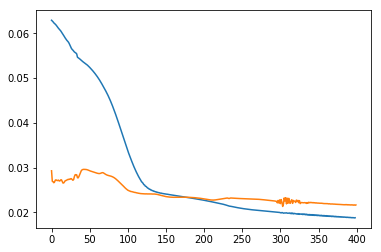

In [231]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])

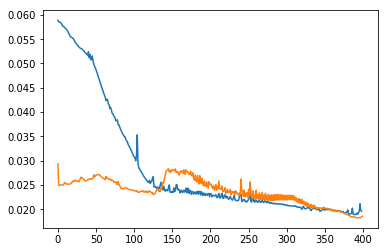

In [236]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])

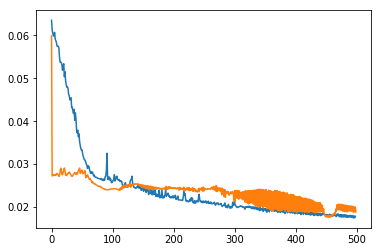

In [245]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])

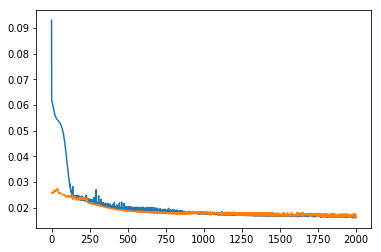

In [322]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])

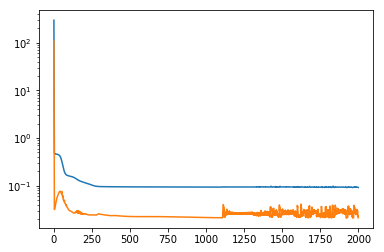

In [453]:
plt.plot(history_g.history['loss'][:])
plt.plot(history_g.history['val_loss'][:])
plt.yscale('log')
#plt.xscale('log')

In [30]:
encoded_lcs_train = autoencoder.encoder(X_train).numpy()
decoded_lcs_train = autoencoder.decoder(encoded_lcs_train).numpy()

encoded_lcs_test = autoencoder.encoder(X_test).numpy()
decoded_lcs_test = autoencoder.decoder(encoded_lcs_test).numpy()

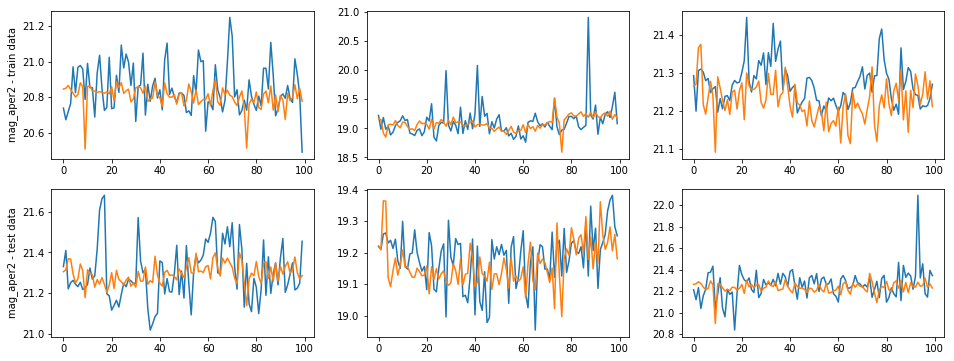

In [31]:
index = 1;

plt.figure(figsize=(16,6))
plt.subplot(2,3,1)
plt.plot(X_train[index])
plt.plot(decoded_lcs_train[index])
plt.ylabel('mag_aper2 - train data')

plt.subplot(2,3,2)
plt.plot(X_train[index+1])
plt.plot(decoded_lcs_train[index+1])

plt.subplot(2,3,3)
plt.plot(X_train[index+2])
plt.plot(decoded_lcs_train[index+2])

plt.subplot(2,3,4)
plt.plot(X_test[index])
plt.plot(decoded_lcs_test[index])
plt.ylabel('mag_aper2 - test data')

plt.subplot(2,3,5)
plt.plot(X_test[index+1])
plt.plot(decoded_lcs_test[index+1])

plt.subplot(2,3,6)
plt.plot(X_test[index+2])
plt.plot(decoded_lcs_test[index+2])

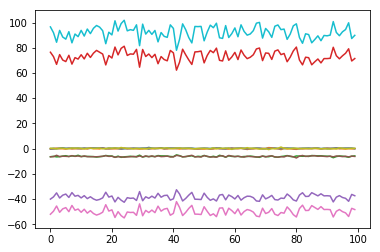

In [40]:
plt.plot(encoded_lcs_train[0:100])

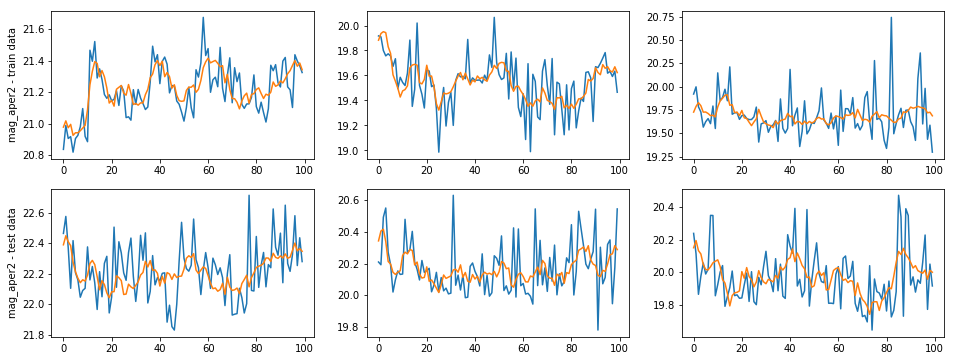

In [323]:
# Latent_dim = 10
index = 1;

plt.figure(figsize=(16,6))
plt.subplot(2,3,1)
plt.plot(X_train[index])
plt.plot(decoded_lcs_train[index])
plt.ylabel('mag_aper2 - train data')

plt.subplot(2,3,2)
plt.plot(X_train[index+1])
plt.plot(decoded_lcs_train[index+1])

plt.subplot(2,3,3)
plt.plot(X_train[index+2])
plt.plot(decoded_lcs_train[index+2])

plt.subplot(2,3,4)
plt.plot(X_test[index])
plt.plot(decoded_lcs_test[index])
plt.ylabel('mag_aper2 - test data')

plt.subplot(2,3,5)
plt.plot(X_test[index+1])
plt.plot(decoded_lcs_test[index+1])

plt.subplot(2,3,6)
plt.plot(X_test[index+2])
plt.plot(decoded_lcs_test[index+2])

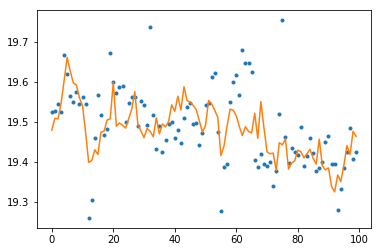

In [359]:
index = 4;

plt.plot(X_test[index], '.')
plt.plot(decoded_lcs[index])

In [334]:
autoencoder.summary()

Model: "autoencoder_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_20 (Sequential)   multiple                  1010      
_________________________________________________________________
sequential_21 (Sequential)   multiple                  1100      
Total params: 2,110
Trainable params: 2,110
Non-trainable params: 0
_________________________________________________________________


In [456]:
encoded_lcs_train_g = autoencoder_g.encoder(X_train).numpy()
decoded_lcs_train_g = autoencoder_g.decoder(encoded_lcs_train_g).numpy()

encoded_lcs_test_g = autoencoder_g.encoder(X_test).numpy()
decoded_lcs_test_g = autoencoder_g.decoder(encoded_lcs_test_g).numpy()

In [457]:
encoded_lcs_train_gg = autoencoder.encoder(X_train).numpy()
decoded_lcs_train_gg = autoencoder.decoder(encoded_lcs_train_gg).numpy()

encoded_lcs_test_gg = autoencoder.encoder(X_test).numpy()
decoded_lcs_test_gg = autoencoder.decoder(encoded_lcs_test_gg).numpy()

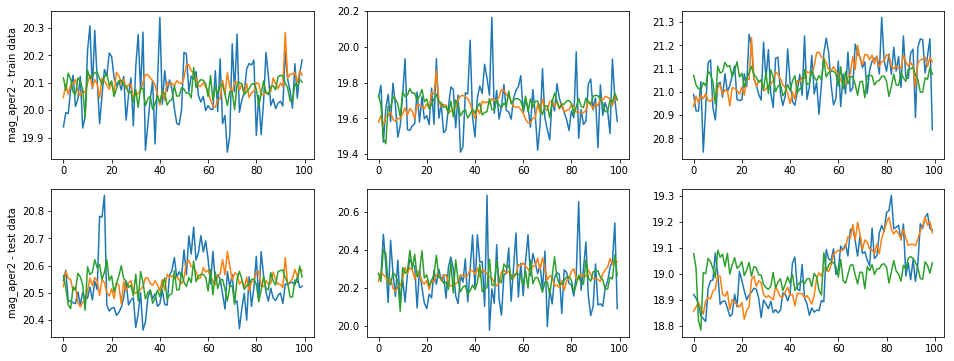

In [458]:
# Latent_dim = 10
# Filter = 'g'
index = 4;

plt.figure(figsize=(16,6))
plt.subplot(2,3,1)
plt.plot(X_train[index])
plt.plot(decoded_lcs_train_gg[index])
plt.plot(decoded_lcs_train_g[index])
plt.ylabel('mag_aper2 - train data')

plt.subplot(2,3,2)
plt.plot(X_train[index+1])
plt.plot(decoded_lcs_train_gg[index+1])
plt.plot(decoded_lcs_train_g[index+1])

plt.subplot(2,3,3)
plt.plot(X_train[index+2])
plt.plot(decoded_lcs_train_gg[index+2])
plt.plot(decoded_lcs_train_g[index+2])

plt.subplot(2,3,4)
plt.plot(X_test[index])
plt.plot(decoded_lcs_test_gg[index])
plt.plot(decoded_lcs_test_g[index])
plt.ylabel('mag_aper2 - test data')

plt.subplot(2,3,5)
plt.plot(X_test[index+1])
plt.plot(decoded_lcs_test_gg[index+1])
plt.plot(decoded_lcs_test_g[index+1])

plt.subplot(2,3,6)
plt.plot(X_test[index+2])
plt.plot(decoded_lcs_test_gg[index+2])
plt.plot(decoded_lcs_test_g[index+2])

## t-SNE

In [351]:
%%time
tsne = manifold.TSNE(n_components=2, perplexity=200, learning_rate=200, n_iter=5000, init='pca', random_state=0)

lcs_tsne = tsne.fit_transform(encoded_lcs_train[:1000,:])

lcs_tsne.shape

Wall time: 16.8 s


(1000, 2)

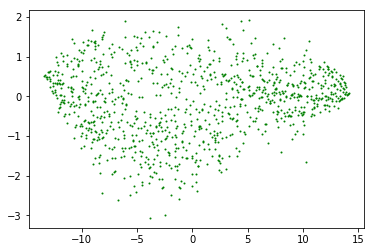

In [352]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green') # perplexity=200, n_iter=5000

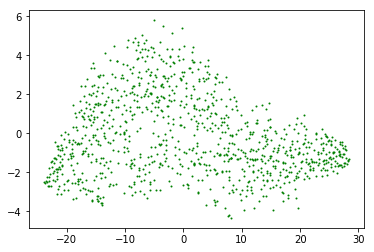

In [350]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green') # perplexity=100, n_iter=5000

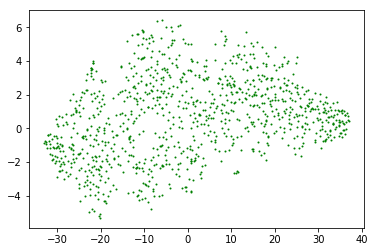

In [348]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green') # perplexity=75, n_iter=5000

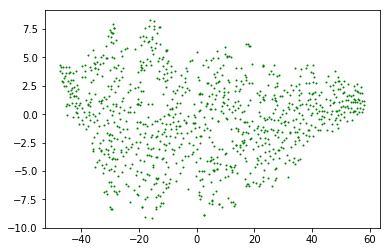

In [346]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green') # perplexity=50, n_iter=5000

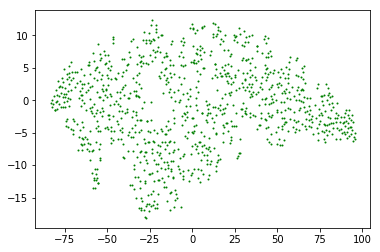

In [344]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green') # perplexity=30, n_iter=5000

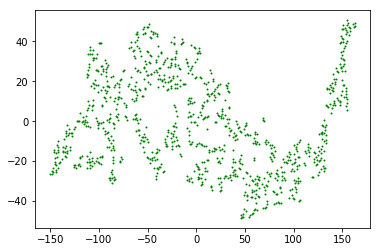

In [342]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green') # perplexity=10, n_iter=5000

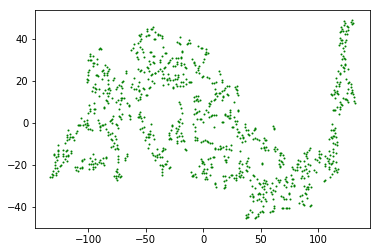

In [340]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green')

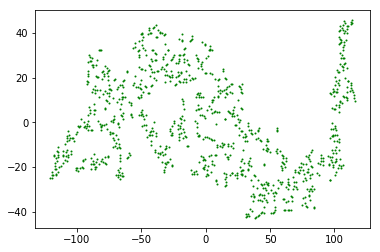

In [338]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green')

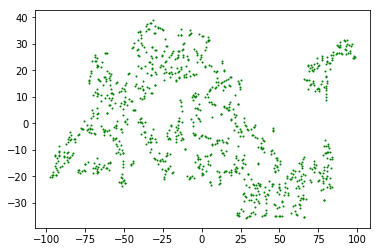

In [336]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green')

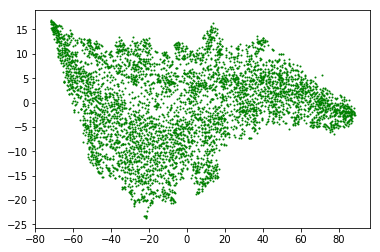

In [281]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green') #n_iter = 10000, perplexity=100

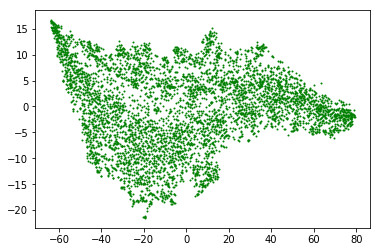

In [279]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green') #n_iter = 1000, perplexity=100

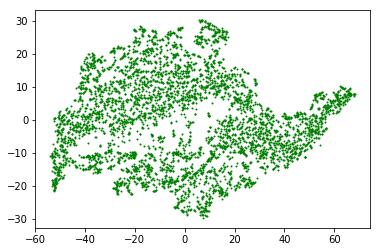

In [275]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green') #n_iter = 500, perplexity=30.0

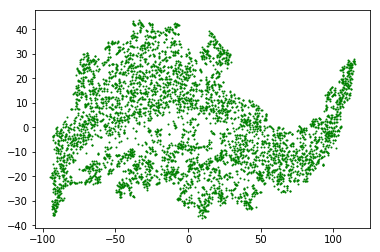

In [273]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green') #n_iter = 1000, perplexity=30.0

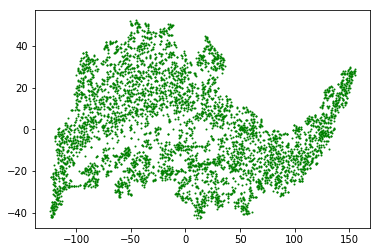

In [277]:
plt.scatter(lcs_tsne[:,0], lcs_tsne[:,1], s=1, c='green') #n_iter = 2000